In this notebook, we will implement a Convoulutional Neural Network (CNN) using pytorch for MNIST Classification.

Expectations: Please provide solutions to the questions in the cells at the end of the notebook.

In [1]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models,transforms
from torchvision.utils import make_grid
from torchvision.datasets import MNIST
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

We will be using MNIST Disgits datasets. The MNIST Digits dataset consists of 70000 28x28 grayscale images of digits from 0 to 9, with 6000 images per class. There are 60000 training images and 10000 test images. <br>

Following are the some random samples from the dataset.

![MNIST Samples](https://www.yunzhew.com/project/mnist-digit-net/featured_hudee2c27f78ea2485e0d3aa44abbfc53c_218555_720x2500_fit_q75_h2_lanczos_3.webp)

We will use pytorch datasets to fetch the MNIST Digits dataset as it provides a handy way to get and use the dataset. More information about pytorch datasets [here](https://pytorch.org/vision/stable/datasets.html).

# Data Loading

In [2]:
batch_sz=64 # this is batch size i.e. the number of rows in a batch of data

# Import the Dataset
train_dataset = MNIST(root='./datasets', train=True, download=True, transform = transforms.ToTensor())
test_dataset = MNIST(root='./datasets', train=False, download=True, transform = transforms.ToTensor())

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size = batch_sz, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_sz)

In [3]:
# len() returns the number of batches in the train loader
# ouput is = num_samples / batch size - > 60,000/64
len(train_loader)

938

In [4]:
# iter() makes the train_loader iteratable, so we can take the first batch
# next() takes the first batch
x, y = next(iter(train_loader))

# Print the shape
# 64 is the batch size, 1 is the number of channels (1 because it is gray scale images), 28 28 are the width and height.
x.shape

torch.Size([64, 1, 28, 28])

## Convolutional Neural Networks

Now, we will construct a Convolutional Neural Network. Convolutional neural networks are a type of neural networks which are typically applied to image data. They work by convolving a filter on an image. Filters act as weights of CNN and we learn these filters to extract useful information from an image. Filters are also sometimes called kernels.
<br>

We element-wise muliply a filter with a patch of input data and then sum the result.<br>
$$z_{ij} = W \star x_{ij} = \sum^{m-1}_{a=0}\sum^{m-1}_{b=0} W_{ab} \: x_{(i+a)(j+b)}$$
![convolution](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif) [source](https://commons.wikimedia.org/wiki/File:2D_Convolution_Animation.gif)

<br>

A convolutional layer in a CNN consists of a number applying a number of such filters to the input. The output of each of these filters is stacked in the form of multiple channels (just like we have 3 channesl in an RGB image). The filters then also become 3-dimensional.

![2d conv](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*oFVlkvZp848nh-QoD3pREw.png) [source](https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215)

### Stride

When we are dealing with convolution on images of very large size, its not always required to convolve over each and every pixel of an image. So we can set the subsequent convolutions to be shifted by more than one pixel in either the vertical or horizontal axis. This shift in subsequent convolutions is called the stride.

![stride](https://miro.medium.com/v2/resize:fit:1400/1*BNLPHcNxLCgtwlJHnSs9oA.gif) [source](https://medium.com/swlh/convolutional-neural-networks-part-2-padding-and-strided-convolutions-c63c25026eaa)

### Pooling

The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarising the features lying within the region covered by the filter.

Pooling layers are used to reduce the dimensions of the feature maps and summarising the featre maps.

Types of Pooling Layers:
1.   Max Pooling: <br>
Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. This is the most commonly used pooling layer.
![Max Pooling](https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png) [source](https://www.geeksforgeeks.org/cnn-introduction-to-pooling-layer/)


2.   Average Pooling: <br>
Average pooling computes the average of the elements present in the region of feature map covered by the filter.
![Avg Pooling](https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png) [source](https://www.geeksforgeeks.org/cnn-introduction-to-pooling-layer/)



### Convolutional Neural Network
A common CNN model architecture is to have a number of convolution and pooling layers stacked one after the other.
![cnn](https://indiantechwarrior.com/wp-content/uploads/2021/04/LeNet-1024x393.png) [source](https://indiantechwarrior.com/convolutional-neural-network-architecture/)



We will use the categorical crossentropy loss here which is traditionally used for classification.

$$\mathcal{L} = \frac{1}{N} \sum^{N}_{i=1} \left ( \sum^{C}_{j=1} -y_{i,j}\: log(\hat{y}_{i,j}) \right )$$

where $y_i,j$ is the groundtruth, $\hat{y}_{i,j}$ is the prediction, $C$ is the number classes and $N$ is the number of data samples.

# Exercises

## Models

In [5]:
#Q1: define a 2 layer simple NN for mnist digit classificaiton

In [6]:
# NN model

class NN(nn.Module):
  def __init__(self, input, output):
    super(NN, self).__init__()
    self.linear1 = nn.Linear(input, 271)
    self.linear2 = nn.Linear(271, output)
    self.relu = nn.ReLU()
    self.softmax  = torch.nn.Softmax(dim = 1) # we use softmax to turn the output into probabilities between 0 and 1.

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.linear1(x)
    x = self.relu(x)
    x = self.linear2(x)
    x = self.softmax(x)
    return x


In [7]:
# CNN model

# structure = conv2 layer, max pool, conv2 layer, max pool, linear layer, linear layer
class CNN(nn.Module):
  def __init__(self, input, output):
    super().__init__()

    # parameters = input channel num, output channel num, filter size, stride size, padding size
    self.conv1 = nn.Conv2d(input,20,3,1,1) # 2d since we're dealing with pics
    self.conv2 = nn.Conv2d(20,50,3,1,1)
    self.linear1 = nn.Linear(50 * 7 * 7 , 100) # from forward passing
    self.linear2 = nn.Linear(100,output) # output = 10 numbers -> 10 classes

  def forward(self, x):
    # feature extractor part
    # x = (1,28,28)
    x = self.conv1(x)
    x1 = torch.relu(x)

    # x = (20,28,28) - > conv layer only chaneged the num of channels here
    x = F.max_pool2d(x1, (2,2)) # 2,2 size of the max pool filter

    # x = (20,14,14)
    x = self.conv2(x)
    x2 = torch.relu(x)

    # x = (50,14,14)
    x = F.max_pool2d(x2, (2,2))

    # x = (50,7,7)
    #flatten it before sending it to the linear layers
    x = x.view(-1, 50* 7 * 7)
    x = self.linear1(x)
    x = torch.relu(x)
    x = self.linear2(x)

    # x = torch.softmax(x)  we dont add softmax because it is used in cross entropy loss
    return x, x1, x2

## Training

In [8]:
# Define the device to use GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
#Q3: Train both networks for 10 epochs and compare their performance

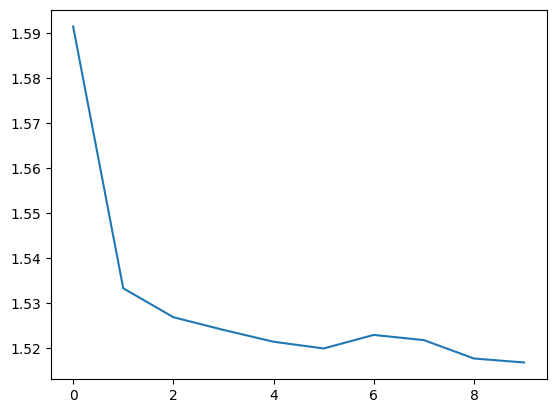

In [10]:
# NN model training

# 1 is the number of channels, 28*28 are the width and height of the image
# always print out the shape of your data.
model1 = NN(1*28*28, 10).to(device)
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

epoch = 10
ls = []

for i in range(epoch):
  total_loss = 0
  for X, y in train_loader: # We take the X and y directly from the batch
    X, y = X.to(device), y.to(device)

    # forward pass
    output = model1(X)

    # calculate loss
    loss = criterion(output, y)

    # backward passing
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss+=loss.item()
  ls.append(total_loss/len(train_loader))

plt.plot(ls)

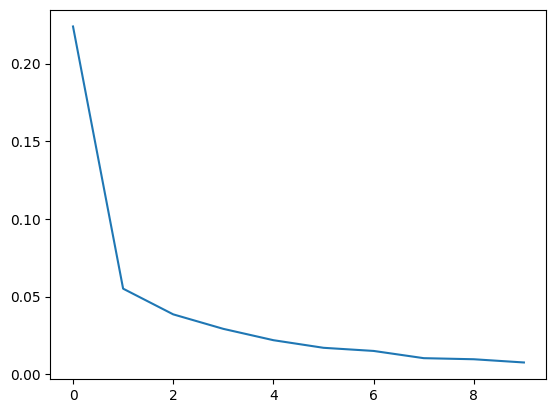

In [11]:
# CNN model

#1 is the number of input channels (gray scale), 10 is the number of classes
model2 = CNN(1, 10).to(device)

num_epochs = 10
lr = 0.1
momentum = 0.5

opt = optim.SGD(model2.parameters(), lr = lr, momentum = momentum) # define optimizer

ls = []
for i in range(num_epochs):
  total_loss = 0
  for batch in train_loader: # Here we take the batch, then extract the X and y from it (it is the same as the training loop above, both are correct).
    X,y = batch[0].to(device), batch[1].to(device)

    # forward pass
    yhat = model2(X)[0]

    # calculate loss
    loss = F.cross_entropy(yhat, y)

    # backward passing
    opt.zero_grad()
    loss.backward()
    opt.step()

    total_loss += loss.item()

  ls.append(total_loss/len(train_loader))

plt.plot(ls)

## Evaluation

In [12]:
#Q4: Compare the accuarcay of both networks on the test set

In [13]:
# Accuracy function for NN
def Accuracy_NN(model, test_loader):

  # all techniques used for training (e.g. dropouts, batch normalization) will be freezed during eval mode
  model.eval()

  # no_grad() disables gradient calculations to reduce memory consumptions (basically makes it faster)
  with torch.no_grad():
    correct  = 0
    total = 0
    for X, y in test_loader:
      X, y = X.to(device), y.to(device)

      output = model(X)
      loss = criterion(output, y)
      pred = torch.argmax(output, dim = 1)
      correct += sum(pred == y)
      total += len(y)

  print(f"The accuracy is {correct.item()/total * 100 :.2f}% \n")

In [14]:
# Accuracy function for CNN
# they are two different functions because the CNN model also returns the intermediate layers.
def Accuracy_CNN(model, test_loader):
  model.eval()

  with torch.no_grad():
    correct  = 0
    total = 0
    for X, y in test_loader:
      X, y = X.to(device), y.to(device)

      output = model(X)[0]
      loss = criterion(output, y)
      pred = torch.argmax(output, dim = 1)
      correct += sum(pred == y)
      total += len(y)

  print(f"The accuracy is {correct.item()/total * 100 :.2f}% \n")

In [15]:
# NN model
Accuracy_NN(model1, test_loader)

# CNN model
Accuracy_CNN(model2, test_loader)

The accuracy is 94.61% 

The accuracy is 99.01% 



## Visualization

In [16]:
#Q5: go through the testset and plot some samples of incorrect results

In [17]:
xs = [] # Images
ys = [] # True labels
yhats = [] # Predictions
with torch.no_grad():
  for batch in train_loader:
    x,y = batch[0].to(device), batch[1].to(device)
    yhat = model2(x)[0]
    label = torch.argmax(yhat, dim= 1)
    ind_incorrect = label != y # this is a mask its true only when our prediction is wrong
    sample = x[ind_incorrect, :, :, :] # only get the samples where we predicted their label wrong
    ground_truth = y[ind_incorrect]
    ys.append(ground_truth)
    yhats.append(label[ind_incorrect])
    xs.append(sample)

In [18]:
# enumerating the wrong samples and getting their predicition, ground truths and images
for i, element in enumerate(xs):
  if element.shape[0] > 0:
    sam = xs[i]
    gt = ys[i]
    pred = yhats[i]

predicted label = tensor([6])
ground truth = tensor([1])


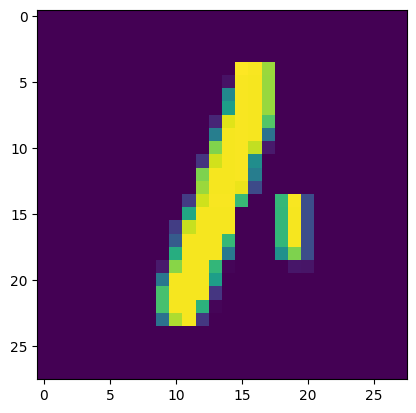

In [19]:
# printingt the image, label, and prediction
print(f'predicted label = {pred.cpu()}')
print(f'ground truth = {gt.cpu()}')
plt.imshow(sam[0,0,:,:].cpu())

In [20]:
#Q6: show the output of the intermediate layers

In [21]:
# Get the first batch
batch = next(iter(test_loader))
X = batch[0].to(device)

# Inference the model and get all intermediate layers
with torch.no_grad():
  Yhat, X1, X2 = model2(X)

# Check the channels and the dimensions of the intermediate layers, they match the CNN model architecture.
print(X1.shape, X2.shape)

torch.Size([64, 20, 28, 28]) torch.Size([64, 50, 14, 14])


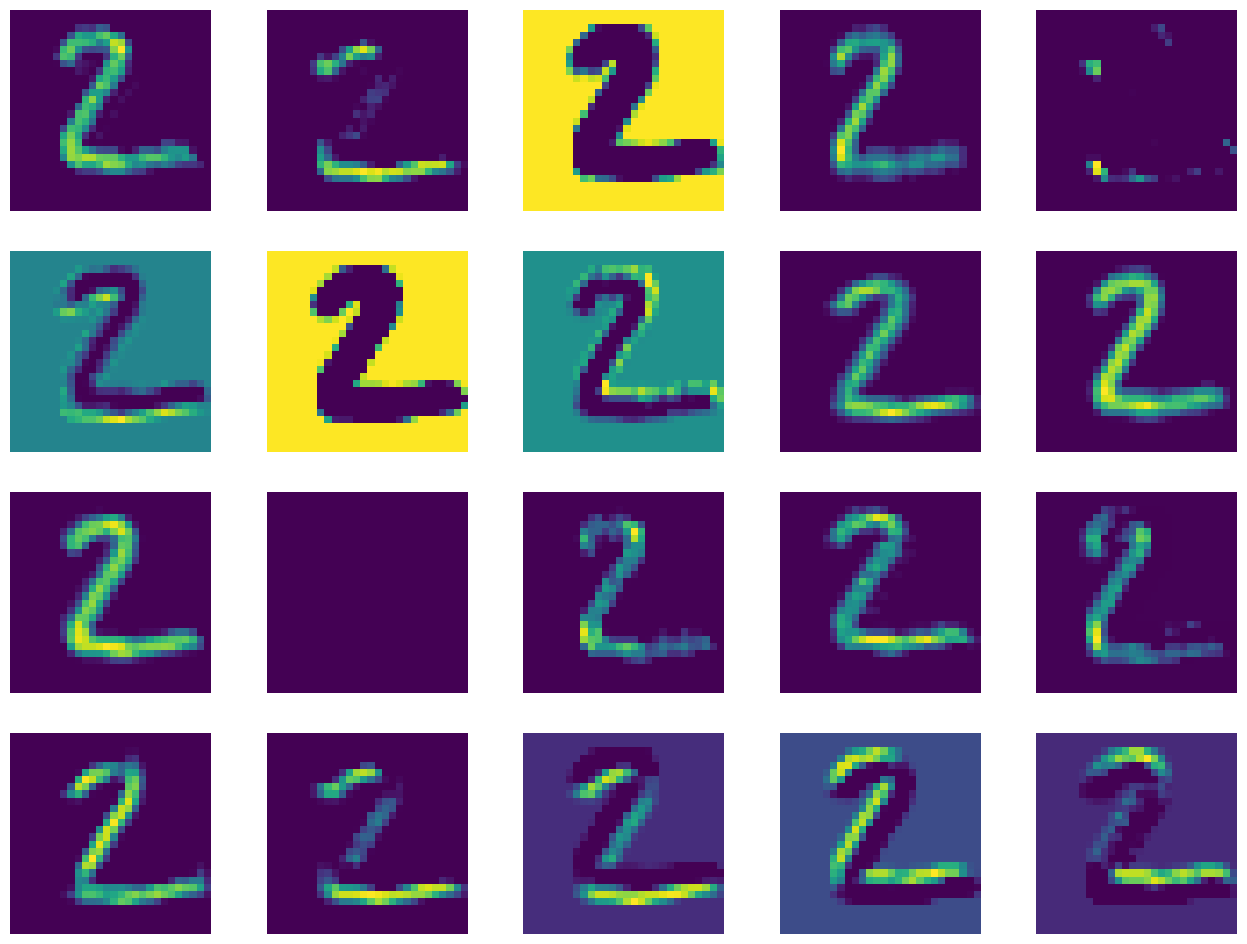

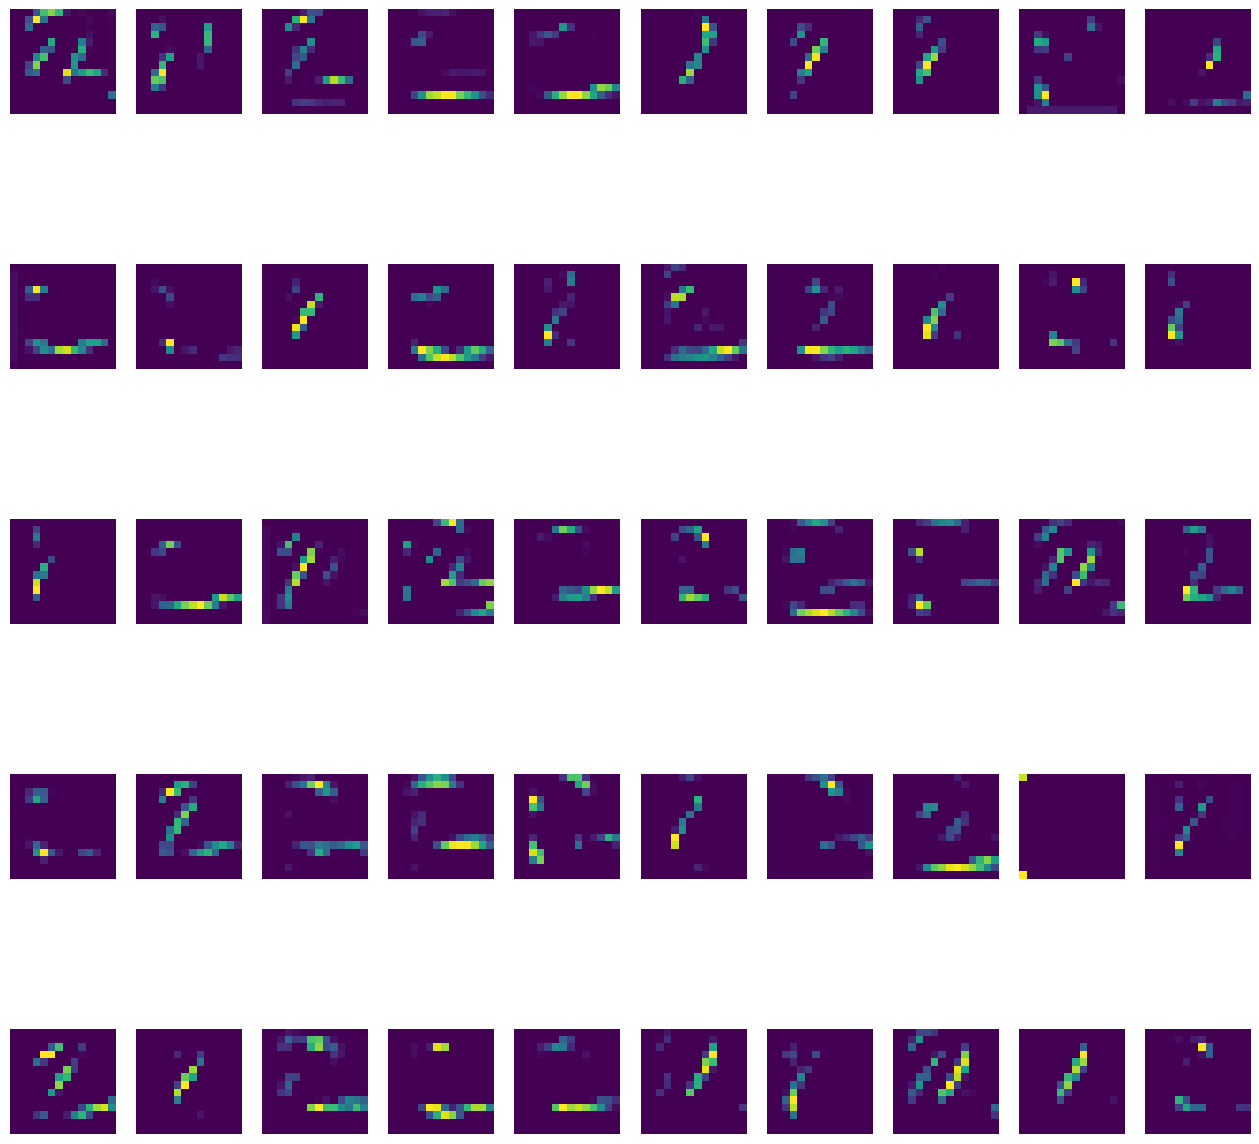

In [22]:
n = 1 # the sample index (change it to see different numbers)

# Plotting X1
plt.figure(figsize=(16,12)) # initialize the canvas

# X1.shape[1] has 20 channels, so it will print all 20 channels.
for i in range(X1.shape[1]):
  plt.subplot(4,5,i+1)
  plt.imshow(X1.cpu()[n,i,:,:])
  plt.axis("off")

# Plotting X2
plt.figure(figsize=(16,16))# initialize the canvas

# X1.shape[1] has 50 channels, there will be 50 images
for i in range(X2.shape[1]):
  plt.subplot(5,10,i+1)
  plt.imshow(X2.cpu()[n,i,:,:])
  plt.axis("off")

In [23]:
#Q7: Compare the time of training on CPU and GPU

In [24]:
# to solve this question, redo all code above but change the device to cpu,
# or simply delete the device line with all .to(device) lines in the code
# don't forget to time it.